In [22]:
from  calculate_simmilarity_resnet import ResnetSimmilarity

from PIL import Image
from progressbar import ProgressBar

from nearpy import Engine
from nearpy.hashes import RandomBinaryProjections
from nearpy.distances import CosineDistance

import sys


import pickle
import os
from nearpy.storage import MemoryStorage

from IPython.display import  display


### Form ResnetSimmilarity we can get embedding of a vector 



In [23]:
res = ResnetSimmilarity()
pbar = ProgressBar()

In [24]:
pic_one = Image.open("./data/flower_data/train/1/image_06734.jpg")
pic_one1 = Image.open("./data/flower_data/train/1/image_06734.jpg")
pic_two = Image.open("./data/flower_data/train/21/image_06774.jpg")
pic_three = Image.open("./data/download.jpeg")

In [25]:
# Dimension of our vector space
dimension = 2048

# Create a random binary hash with 10 bits
rbp = RandomBinaryProjections('rbp', 10)


msote = MemoryStorage()

engine = Engine(dimension, lshashes=[rbp],storage=msote,distance=CosineDistance())

#### Adding the Images to the Hash Table

In [5]:
%%time

rootdir = 'data/flower_data/train/'


for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if '.jpg' in file:
            img_path = os.path.join(subdir, file)
            img = Image.open(img_path)
            
            img_emb = res.getMapping(img)
            img_emb = img_emb.view(-1,2048)
            img_emb = img_emb.numpy()
            
            
            engine.store_vector(img_emb[0],img_path)

CPU times: user 4min 12s, sys: 3min 7s, total: 7min 20s
Wall time: 2min 12s


#### Save Image Hashed Table to File

In [6]:
%%time
filehandler = open("hashed_object.pkl", 'w')
pickle.dump(engine, filehandler)

CPU times: user 7.78 s, sys: 132 ms, total: 7.92 s
Wall time: 7.91 s


### Restore Hased Table 

In [26]:
%%time
filehandler = open("hashed_object.pkl", 'r')
en_loaded = pickle.load(filehandler)

CPU times: user 2.04 s, sys: 88 ms, total: 2.13 s
Wall time: 2.13 s


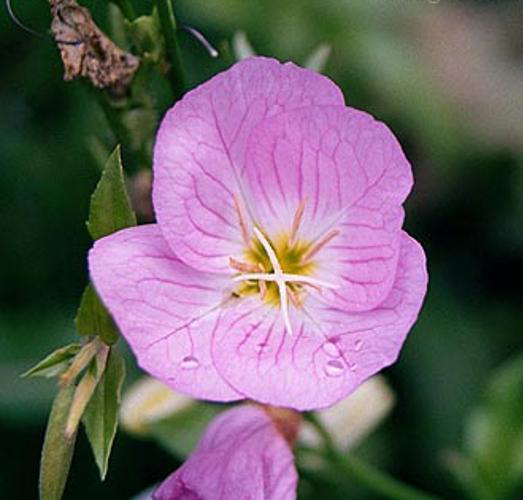

(1, 2048)


In [49]:

# image to test query
pic_one1_emb = res.getMapping(pic_one1)
pic_one1_emb = pic_one1_emb.view(-1,2048)
pic_one1_emb = pic_one1_emb.numpy()
display(pic_one1)
print(pic_one1_emb.shape)


query = pic_one1_emb[0]

In [50]:
import matplotlib.pyplot as plt
import numpy as np

#### Query on one image and get simmilarity result

-8.881784197001252e-16


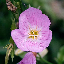

0.003630611497433489


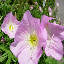

0.0036499635462940994


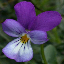

0.0036628782824642547


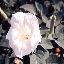

0.003675332491942851


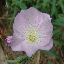

0.0036829865679275375


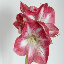

0.003683268981946153


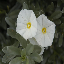

0.003687652610759984


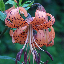

0.0036881561760176984


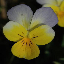

0.0036995024468846616


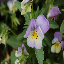

CPU times: user 256 ms, sys: 92 ms, total: 348 ms
Wall time: 195 ms


In [51]:
%%time

N = en_loaded.neighbours(query)
for i in range(len(N)):
    print(N[i][2])
    img = Image.open(N[i][1])
    img = img.resize((64,64))
    display(img)
    
    
